<a href="https://colab.research.google.com/github/jamesgiddingsott/recipe_cosine/blob/main/recipes_public_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Package Installations and Library Imports

In [18]:
!pip install recipe-scrapers -q

### Imports

In [19]:
import pandas as pd
import numpy as np
import requests, bs4
import random
import smtplib
from recipe_scrapers import scrape_me
import math
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Functions

The below functions convert the recipes we wish to compare by doing a total word count from the recipe text.  This information is then stored in a counter object from which we generate a vector for each word.<br>
These vectors are then compared via the **get_cosine** function to determine their Cosine Similarity or degree of seperation.  For further reading on the topic I suggest checking out this great article by Tracyrenee: [Different ways to calculate Cosine Similarity in Python](https://medium.com/geekculture/different-ways-to-calculate-cosine-similarity-in-python-ae5bb28c372c)

In [20]:
WORD = re.compile(r"\w+")

def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)

In [21]:
def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

The below are various helper functions to clean data and aid in the selection and randomization of recipes for menu selection.

In [22]:
def clean_string(text):
  text = ''.join([word for word in text if word not in string.punctuation])
  text = text.lower()
  text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
  return text

In [23]:
def menu_var(week_menu, df):
  df_menu = df[week_menu]
  df_menu = df_menu.T
  df_menu = df_menu[week_menu]
  v_score = (df_menu.sum().sum() - 4)/2
  # print(week_menu,", Variability Score: ", v_score, "\n")
  return v_score

In [24]:
def menu_randomizer(df, cycles):
  menu_dict = {}
  for i in range(cycles):
    index_list = df.columns
    random_menu_0 = ([np.random.randint(0, len(df)) for i in range(4)])
    random_menu = []
    
    for j in random_menu_0:
      x4 = index_list[j]
      random_menu.append(x4)

    random_menu_var = menu_var(random_menu, df)
    menu_dict[random_menu_var] = random_menu
      
  sorted_menu_dict = dict(sorted(menu_dict.items()))
  return sorted_menu_dict


In [25]:
def drop_both_axes(list, df):
  if len(list) == 0:
    pass
  else:
    df.drop(list, axis=0, inplace=True)
    df.drop(list, axis=1, inplace=True)  

In [26]:
def get_titles(list):
  for item in list:
    print(title_list[item])

# Recipe Links to Scrape



Below is a sample of list of recipe links to scrape ffom one of the supported sites for the scraping library.  AllRecipes.com was found to be the most stable site in terms of interaction and maintenance issues.

In [27]:
r_list = ['https://www.allrecipes.com/recipe/267967/low-carb-stuffed-peppers/',	
          'https://www.allrecipes.com/recipe/40399/the-best-meatballs/',	
          'https://www.allrecipes.com/recipe/261032/easy-keto-beef-tacos/',	
          'https://www.allrecipes.com/recipe/275645/instant-pot-chicken-and-gravy/',	
          'https://www.allrecipes.com/recipe/268565/instant-pot-hamburger-soup/',	
          'https://www.allrecipes.com/recipe/282788/instant-pot-tuscan-chicken-pasta/',
          'https://www.allrecipes.com/recipe/260377/rebekahs-keto-egg-casserole/',
          'https://www.allrecipes.com/recipe/239682/easy-tacos/',
          'https://www.allrecipes.com/recipe/16354/easy-meatloaf/',
          'https://www.allrecipes.com/recipe/272325/keto-chicken-strips/',
          'https://www.allrecipes.com/recipe/16982/spicy-grilled-chicken/',
          'https://www.allrecipes.com/recipe/272544/baked-lemon-butter-chicken-thighs/',
          'https://www.allrecipes.com/recipe/269696/instant-pot-beef-stuffed-peppers/',
          'https://www.allrecipes.com/recipe/268877/instant-pot-turkey-cheeseburger-soup/',
          'https://www.allrecipes.com/recipe/21353/italian-spaghetti-sauce-with-meatballs/',
          'https://www.allrecipes.com/recipe/24264/sloppy-joes-ii/',
          'https://www.allrecipes.com/recipe/228293/curry-stand-chicken-tikka-masala-sauce/',
          'https://www.allrecipes.com/recipe/240400/skillet-chicken-bulgogi/',
          'https://www.allrecipes.com/recipe/53075/jimmys-mexican-pizza/',
          'https://www.allrecipes.com/recipe/205540/easy-mediterranean-fish/',
          'https://www.allrecipes.com/recipe/178295/slider-style-mini-burgers/',
          'https://www.allrecipes.com/recipe/242269/slow-cooker-buffalo-chicken-lettuce-wraps/',
          'https://www.allrecipes.com/recipe/19132/cashew-crusted-chicken/',
          'https://www.allrecipes.com/recipe/240605/shipwreck-dinner/',
          'https://www.allrecipes.com/recipe/270338/salmon-foil-pack-dinner/',
          'https://www.allrecipes.com/recipe/274420/rice-and-bean-bowl-dinner/'   

          ]

Scraping the information from the recipe's webpages via the recipie-scraper library there are now a list of attributes one can access.  The attributes we have interest in will be placed into their respective lists.

In [28]:
ing_list = []
dir_list=[]
title_list=[]
yield_list=[]
link_list=[]

for recipe in r_list:
  print(recipe)
  scraper = scrape_me(recipe)
  t = scraper.title()
  y = scraper.yields()
  i = scraper.ingredients()
  d = scraper.instructions()
  link = scraper.links()
  ing_list.append(i)
  dir_list.append(d)
  title_list.append(t)
  yield_list.append(y)
  # link_list.append(link)

https://www.allrecipes.com/recipe/267967/low-carb-stuffed-peppers/
https://www.allrecipes.com/recipe/40399/the-best-meatballs/
https://www.allrecipes.com/recipe/261032/easy-keto-beef-tacos/
https://www.allrecipes.com/recipe/275645/instant-pot-chicken-and-gravy/
https://www.allrecipes.com/recipe/268565/instant-pot-hamburger-soup/
https://www.allrecipes.com/recipe/282788/instant-pot-tuscan-chicken-pasta/
https://www.allrecipes.com/recipe/260377/rebekahs-keto-egg-casserole/
https://www.allrecipes.com/recipe/239682/easy-tacos/
https://www.allrecipes.com/recipe/16354/easy-meatloaf/
https://www.allrecipes.com/recipe/272325/keto-chicken-strips/
https://www.allrecipes.com/recipe/16982/spicy-grilled-chicken/
https://www.allrecipes.com/recipe/272544/baked-lemon-butter-chicken-thighs/
https://www.allrecipes.com/recipe/269696/instant-pot-beef-stuffed-peppers/
https://www.allrecipes.com/recipe/268877/instant-pot-turkey-cheeseburger-soup/
https://www.allrecipes.com/recipe/21353/italian-spaghetti-sau

### Recipe List

In [29]:
print("Entries: ",len(title_list),'\n')

for title in range(len(title_list)):
  name = title_list[title]
  print(title, ': ', name)

Entries:  26 

0 :  Low-Carb Stuffed Peppers
1 :  The Best Meatballs
2 :  Easy Keto Beef Tacos
3 :  Instant Pot® Chicken and Gravy
4 :  Instant Pot® Hamburger Soup
5 :  Instant Pot® Tuscan Chicken Pasta
6 :  Rebekah's Keto Egg Casserole
7 :  Easy Tacos
8 :  Easy Meatloaf
9 :  Keto Chicken Strips
10 :  Spicy Grilled Chicken
11 :  Baked Lemon-Butter Chicken Thighs
12 :  Instant Pot® Beef-Stuffed Peppers
13 :  Instant Pot® Turkey Cheeseburger Soup
14 :  Italian Spaghetti Sauce with Meatballs
15 :  Sloppy Joes II
16 :  Curry Stand Chicken Tikka Masala Sauce
17 :  Skillet Chicken Bulgogi
18 :  Jimmy's Mexican Pizza
19 :  Easy Mediterranean Fish
20 :  Slider-Style Mini Burgers
21 :  Slow Cooker Buffalo Chicken Lettuce Wraps
22 :  Cashew Crusted Chicken
23 :  Shipwreck Dinner
24 :  Salmon Foil-Pack Dinner
25 :  Rice and Bean Bowl Dinner


**EXAMPLE:**
<br/><br/>
*Below are listed the class call and attributes of the recipe scraper*
<br/><br/>
scraper = scrape_me('https://www.allrecipes.com/recipe/166638/baked-buffalo-wings/')

scraper.title()

scraper.total_time()

scraper.yields()

scraper.ingredients()

scraper.instructions()

scraper.image()

scraper.host()

scraper.links()

scraper.nutrients(),   *if available*



## Select Individual Recipe

One can test out grabbing a downloaded recipe and retrieving the desired information from their respective lists.

In [30]:
selection_index = -1

print(selection_index,": ", title_list[selection_index])
print("\n",yield_list[selection_index])
print("\n",ing_list[selection_index])
print("\n",dir_list[selection_index])


-1 :  Rice and Bean Bowl Dinner

 4 serving(s)

 ['1 tablespoon unsalted butter', "2 (8.8 ounce) packages UNCLE BEN'S® READY RICE® Whole Grain Brown Rice", '1 (15 ounce) can no-salt-added black beans, drained and rinsed', '1 ½ medium avocados, divided', '4 tablespoons cilantro, divided', '3 tablespoons fresh lime juice', '1 pint cherry tomatoes, halved', '1 cup fresh corn kernels', '1 teaspoon kosher salt', '½ teaspoon ground black pepper', '¼ cup tortilla chips']

 Heat a large skillet over medium heat. Melt butter in skillet; add rice and beans, stirring frequently. Cook until heated through, about 3 minutes. Add water, as needed, to get rice to desired texture. Remove from heat; set aside.
In a blender or mini food processor, combine 1/2 of an avocado, 2 tablespoons cilantro, and lime juice. Blend until sauce is thin. Add water if needed.
In 4 separate bowls, evenly divide rice and bean mixture, tomatoes, and corn. Sprinkle with salt and pepper. Drizzle with about 2 tablespoons of a

# Calculate Cosine Similarity

###Text to Vector Calculations

Need to create an empty list to hold all our newly created word vectors
from the recipe instructions, this list will be called: v3.

In [31]:
v3 = []

for x in range(len(dir_list)):
  # print(x)
  x_string = str(x)
  s_x = ''.join(dir_list[x])
  # print(s_x)
  v_x = text_to_vector(s_x)
  # print(v_x)
  v3.append(v_x)



Create a dictionary and calculate the matrix Cosine Simularities of all the recipes.  Stored in dictionary m2, *for 'matrix-2'*.

In [32]:
m2 = {}
for i in range(len(v3)):
  inner_list = []
  # print(i)
  label = i
  for j in range(len(v3)):
    cosine = get_cosine(v3[i], v3[j])
    inner_list.append(cosine)
    
    m2[label] = inner_list

Convert dictionary to a dataframe to label and hold the similarity percentages for easier manipulation and viewing.

In [33]:
df_plot = pd.DataFrame(m2)
df_plot.columns = title_list
df_plot.index = title_list
df_plot.head(2)

,Low-Carb Stuffed Peppers,The Best Meatballs,Easy Keto Beef Tacos,Instant Pot® Chicken and Gravy,Instant Pot® Hamburger Soup,Instant Pot® Tuscan Chicken Pasta,Rebekah's Keto Egg Casserole,Easy Tacos,Easy Meatloaf,Keto Chicken Strips,Spicy Grilled Chicken,Baked Lemon-Butter Chicken Thighs,Instant Pot® Beef-Stuffed Peppers,Instant Pot® Turkey Cheeseburger Soup,Italian Spaghetti Sauce with Meatballs,Sloppy Joes II,Curry Stand Chicken Tikka Masala Sauce,Skillet Chicken Bulgogi,Jimmy's Mexican Pizza,Easy Mediterranean Fish,Slider-Style Mini Burgers,Slow Cooker Buffalo Chicken Lettuce Wraps,Cashew Crusted Chicken,Shipwreck Dinner,Salmon Foil-Pack Dinner,Rice and Bean Bowl Dinner
Low-Carb Stuffed Peppers,1.000000,0.422031,0.558534,0.525093,0.456755,0.567796,0.659633,0.598487,0.500549,0.480458,0.437744,0.666100,0.568704,0.573130,0.487337,0.510901,0.594483,0.397911,0.621048,0.522546,0.676983,0.320135,0.582794,0.667839,0.517506,0.431256
The Best Meatballs,0.422031,1.000000,0.300665,0.371779,0.263244,0.398095,0.380832,0.416487,0.417213,0.358292,0.322928,0.441714,0.401990,0.368503,0.458977,0.374047,0.438842,0.352655,0.410434,0.413495,0.449617,0.351571,0.371731,0.503100,0.296682,0.370507


#Generate Heatmap plot of the entire Dataframe

''

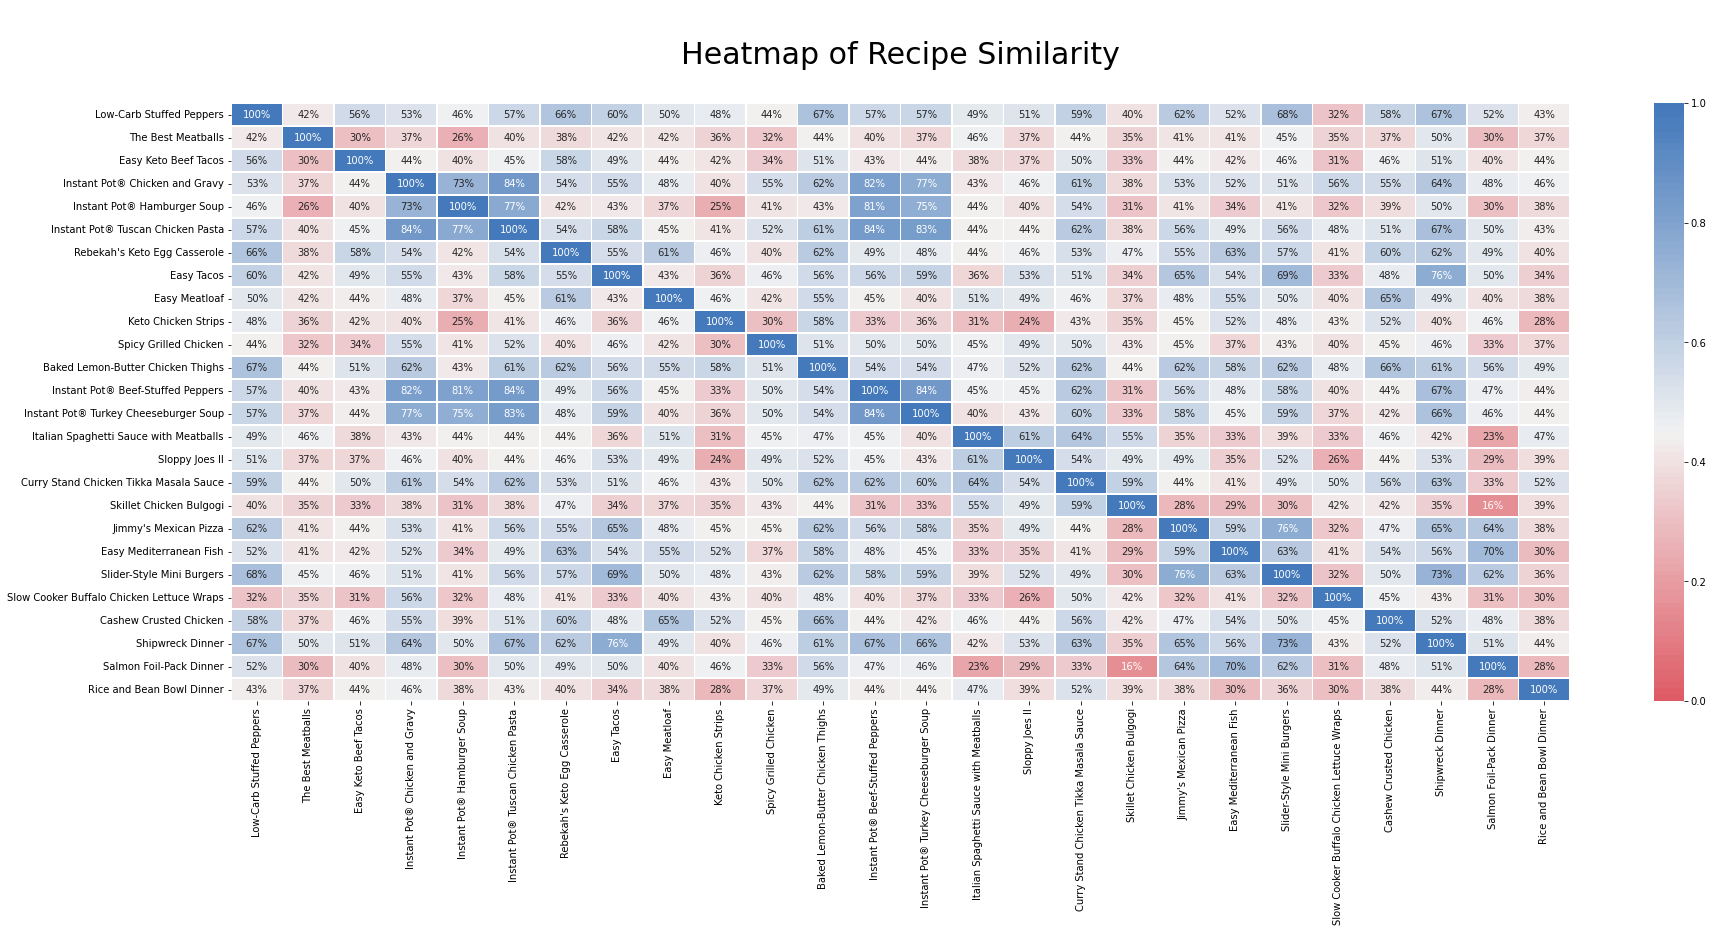

In [34]:
ax = plt.subplots(figsize=(30, 11))

ax = sns.heatmap(
    df_plot, 
    vmin=0 , vmax=1, center=.45,
    # cmap=sns.diverging_palette(20, 220, n=200),
    cmap=sns.diverging_palette(10, 250, n=100),
    annot=True, 
    fmt=".0%",
    linewidths=.5,
    square=False
)
plt.title('\nHeatmap of Recipe Similarity\n', fontsize = 30) # title with fontsize 20
;



# Randomized Run for Menus

The following code randomizes recipe selection into groups of four menus for the week, Mon-Thurs, the weekends are made for restaraunts :)<br>
A total weekly menu similarity score is calcualted from the sum of each cosine similarity of the menus compared with each other.  These total similarity scores are then rank ordered with the the top four least similar menus being shown<br></br>
The amount of random combinations is determined by the **cycles** variable.  The larger the number of cycles the more potential variation one can have at the cost of compute time.  Currently 1,000 cycles : 1-2 seconds, 10,000 cycles : 18-33 seconds.<br>
To remove recipes from the randomization selection list simple eneter the index number into the **old_menus** list.
*In the future it would be nice to parallelize this process to run massive numbers of potential combinations on much larger recipie sets.*

In [44]:
cycles = 1000

df = pd.DataFrame(m2)

old_menus = []

drop_both_axes(old_menus, df)

ms_1 = menu_randomizer(df, cycles)

top_four = []
first_four = list(ms_1)[:4]
for key in first_four:
  entry = (ms_1[key], key)
  top_four.append(entry)
# print(top_four)
print("")

for x in top_four:
  a = x[0]
  print(x[0], x[1])
  get_titles(a)
  print("")

print("\nremaining recipes: ", len(df)-4)



[4, 1, 17, 24] 1.6902227710388482
Instant Pot® Hamburger Soup
The Best Meatballs
Skillet Chicken Bulgogi
Salmon Foil-Pack Dinner

[24, 15, 21, 25] 1.828662111852295
Salmon Foil-Pack Dinner
Sloppy Joes II
Slow Cooker Buffalo Chicken Lettuce Wraps
Rice and Bean Bowl Dinner

[24, 21, 4, 1] 1.841008174099144
Salmon Foil-Pack Dinner
Slow Cooker Buffalo Chicken Lettuce Wraps
Instant Pot® Hamburger Soup
The Best Meatballs

[24, 15, 21, 4] 1.881244170042776
Salmon Foil-Pack Dinner
Sloppy Joes II
Slow Cooker Buffalo Chicken Lettuce Wraps
Instant Pot® Hamburger Soup


remaining recipes:  22


In [36]:
print('\nRECIPE DETAILS: \n')

for i in top_four[0][0]:
  print(title_list[i])
  print(yield_list[i])
  print(ing_list[i])
  print(dir_list[i])
  print('\n')


RECIPE DETAILS: 

Skillet Chicken Bulgogi
4 serving(s)
['¼ cup chopped onion', '5 tablespoons soy sauce', '2 ½ tablespoons brown sugar', '2 tablespoons minced garlic', '2 tablespoons sesame oil', '1 tablespoon sesame seeds', '½ teaspoon cayenne', 'salt and ground black pepper to taste', '1 pound skinless, boneless chicken breasts, cut into thin strips']
Whisk onion, soy sauce, brown sugar, garlic, sesame oil, sesame seeds, cayenne pepper, salt, and black pepper together in a bowl until marinade is smooth.
Cook and stir chicken and marinade together in a large skillet over medium-high heat until chicken is cooked through, about 15 minutes.


Instant Pot® Hamburger Soup
8 serving(s)
['1 ½ pounds ground beef', '1 medium onion, finely chopped', '3 (14.5 ounce) cans beef consomme', '1 (28 ounce) can diced tomatoes', '2 cups water', '1 (10.75 ounce) can condensed tomato soup', '4 carrots, finely chopped', '3 stalks celery, finely chopped', '4 tablespoons pearl barley', '½ teaspoon dried thy

### Manual Menu Selection

manually type index numbers into the list to grab recipe data.

In [39]:

manual_menu = [25, 10, 14, 24]



df = pd.DataFrame(m2)
manual_selection = menu_var(manual_menu, df)
print("Total Similarity Score: ", manual_selection,"\n")
get_titles(manual_menu)

Total Similarity Score:  2.3303537048562237 

Slow Cooker Buffalo Chicken Lettuce Wraps
The Best Meatballs
Jimmy's Mexican Pizza
Salmon Foil-Pack Dinner


In [40]:
for i in manual_menu:
  print(i)
  print(title_list[i])
  print(yield_list[i])
  print(ing_list[i])
  print(dir_list[i])
  print('')

21
Slow Cooker Buffalo Chicken Lettuce Wraps
10 serving(s)
['2 pounds skinless, boneless chicken breasts', "1 (12 ounce) bottle cayenne pepper sauce (such as Frank's® RedHot®)", '1 (1 ounce) package ranch dressing mix', '1 head Boston lettuce leaves']
Put chicken into the crock of a slow cooker.
Stir cayenne pepper sauce and ranch dressing mix together in a bowl until smooth; pour over chicken.
Cook on Low for 6 to 7 hours.
Transfer chicken to a large bowl and use 2 forks to shred chicken into strands.
Strain liquid from slow cooker crock into a bowl to serve on the side.
Spoon chicken into lettuce leaves and roll lettuce around chicken.

1
The Best Meatballs
8 serving(s)
['1 pound ground beef', '½ pound ground veal', '½ pound ground pork', '2 cloves garlic, minced', '2 eggs', '1 cup freshly grated Romano cheese', '1 ½ tablespoons chopped Italian flat leaf parsley', 'salt and ground black pepper to taste', '2 cups stale Italian bread, crumbled', '1 ½ cups lukewarm water', '1 cup olive 

# Future Ideas

*   Scan directions to find if any recipes have cooking process overlap and can therefore be combined to make cooking and prep times more efficient.
*   Automate Shopping list.
*   Automate online ordering of shopping list.




